# Exploring Dandiset 001375: Septum GABA disruption with DREADDs

**⚠️ IMPORTANT: This notebook was AI-generated and has not been fully verified. Please exercise caution when interpreting the code or results. ⚠️**

## Overview

This notebook explores Dandiset 001375 (version 0.250406.1855), which is a pilot study investigating the effects of disrupting septal GABAergic activity using DREADDs (Designer Receptors Exclusively Activated by Designer Drugs) on hippocampal and neocortical activity.

In this dataset, mice were running laps in virtual hallways while neural activity was recorded. The data includes electrophysiology recordings from the ventral hippocampus and visual cortex using silicon probes.

Link to the Dandiset: [https://dandiarchive.org/dandiset/001375/0.250406.1855](https://dandiarchive.org/dandiset/001375/0.250406.1855)

In this notebook, we will:
1. Explore the Dandiset metadata
2. Load and examine one of the NWB files
3. Visualize raw electrophysiology data
4. Analyze neural spike times in relation to behavioral trials (laps)
5. Create raster plots and firing rate visualizations

## Required Packages

The following packages are required to run this notebook:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime
import h5py
import remfile
import pynwb
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Set up plotting style
sns.set_theme()

## Connecting to the DANDI Archive and Loading Dandiset Metadata

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001375", "0.250406.1855")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset description: {metadata['description']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Contributors: {', '.join(metadata['contributor'])}")
print(f"Variable measured: {', '.join(metadata['variableMeasured'])}")

Dandiset name: Septum GABA disruption with DREADDs
Dandiset description: Pilot study of the effect of disrupting septal gabaergic activity using DREADDs on hippocampal and neocortical activity
Dandiset URL: https://dandiarchive.org/dandiset/001375/0.250406.1855


TypeError: sequence item 0: expected str instance, dict found

## Examining Assets in the Dandiset

In [3]:
# Get a list of assets in the Dandiset
assets = dandiset.get_assets()
print("\nAvailable assets:")
for asset in islice(assets, 3):  # Limiting to first 3 assets
    print(f"- {asset.path} (ID: {asset.identifier})")
    print(f"  Size: {asset.size / (1024 * 1024 * 1024):.2f} GB")


Available assets:
- sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb (ID: ce525828-8534-4b56-9e47-d2a34d1aa897)
  Size: 51.20 GB
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-12781w8_ecephys.nwb (ID: 376dc673-611b-4521-b135-9ec01c7f4f74)
  Size: 64.68 GB
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-ardad2_ecephys.nwb (ID: fea95c0e-2f07-49a3-b607-4b7e9f278e16)
  Size: 65.00 GB


## Loading and Exploring an NWB File

For this exploration, we'll focus on the NWB file for subject MS13B. Let's load it and examine its contents.

In [4]:
# Define the file URL using the asset ID
asset_id = "ce525828-8534-4b56-9e47-d2a34d1aa897"
url = f"https://api.dandiarchive.org/api/assets/{asset_id}/download/"
print(f"Loading NWB file: sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb")
print(f"Neurosift link: https://neurosift.app/nwb?url={url}&dandisetId=001375&dandisetVersion=0.250406.1855")

# Load the file using remfile and h5py
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

Loading NWB file: sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb
Neurosift link: https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/&dandisetId=001375&dandisetVersion=0.250406.1855


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Basic Information about the NWB File

In [5]:
# Print basic session information
print(f"NWB identifier: {nwb.identifier}")
print(f"Session description: {nwb.session_description}")
print(f"Session start time: {nwb.session_start_time}")
print(f"File created: {nwb.file_create_date[0]}")

# Subject information
subject = nwb.subject
print("\nSubject information:")
print(f"  Subject ID: {subject.subject_id}")
print(f"  Species: {subject.species}")
print(f"  Age: {subject.age}")
print(f"  Sex: {subject.sex}")
print(f"  Description: {subject.description}")

NWB identifier: MS13B
Session description: mouse running laps in virtual hallway
Session start time: 2024-07-25 19:00:00-07:00
File created: 2025-04-05 16:50:15.663983-07:00

Subject information:
  Subject ID: MS13B
  Species: Mus musculus
  Age: P90D
  Sex: M
  Description: medial septum DREADD to suppress GABA interneurons


## NWB File Structure Overview

Let's look at the structure of the NWB file to understand what data is available.

In [6]:
# Overview of the NWB file structure
print("NWB File Structure Summary:")
print("---------------------------")
print("\nAcquisition Data:")
for name in nwb.acquisition.keys():
    item = nwb.acquisition[name]
    if hasattr(item, 'data'):
        shape = item.data.shape
        dtype = item.data.dtype
        print(f"  - {name}: shape {shape}, dtype {dtype}")
    else:
        print(f"  - {name}")

print("\nDevices:")
for name in nwb.devices:
    device = nwb.devices[name]
    print(f"  - {name}: {device.description}")

print("\nElectrode Groups:")
for name in nwb.electrode_groups:
    group = nwb.electrode_groups[name]
    print(f"  - {name}: {group.description} in {group.location}")

print("\nIntervals:")
for name in nwb.intervals:
    interval = nwb.intervals[name]
    print(f"  - {name}: {interval.description}, {len(interval.id)} rows")

print("\nUnits:")
if hasattr(nwb, 'units'):
    print(f"  - {nwb.units.description}, {len(nwb.units.id)} units")

NWB File Structure Summary:
---------------------------

Acquisition Data:
  - time_series: shape (144675584, 256), dtype int16

Devices:
  - silicon probe array: 128 ch silicon probe

Electrode Groups:
  - shank1: shank1, electrodes in ventral hippocampus, visual cortex
  - shank2: shank2, electrodes in ventral hippocampus, visual cortex

Intervals:
  - trials: trial start/stop times, 387 rows

Units:
  - units table, 33 units


## Exploring Electrodes Information

Let's look at the information about the electrodes used in the recordings.

In [7]:
# Converting electrodes table to a pandas DataFrame for better exploration
electrodes_df = nwb.electrodes.to_dataframe()

# Display the first few rows
print(f"Electrodes table shape: {electrodes_df.shape}")
electrodes_df.head()

Electrodes table shape: (256, 7)


,x,y,location,filtering,group,group_name,label
id,,,,,,,
0,20.0,1375.0,unknown,0.1 - 7500.0 Hz,shank1 pynwb.ecephys.ElectrodeGroup at 0x13671...,shank1,shank1-electrode001
1,20.0,1325.0,unknown,0.1 - 7500.0 Hz,shank1 pynwb.ecephys.ElectrodeGroup at 0x13671...,shank1,shank1-electrode002
2,20.0,1275.0,unknown,0.1 - 7500.0 Hz,shank1 pynwb.ecephys.ElectrodeGroup at 0x13671...,shank1,shank1-electrode003
3,20.0,1225.0,unknown,0.1 - 7500.0 Hz,shank1 pynwb.ecephys.ElectrodeGroup at 0x13671...,shank1,shank1-electrode004
4,20.0,1175.0,unknown,0.1 - 7500.0 Hz,shank1 pynwb.ecephys.ElectrodeGroup at 0x13671...,shank1,shank1-electrode005


Let's summarize the electrode information:

In [8]:
# Count electrodes by group
group_counts = electrodes_df['group_name'].value_counts()
print("Electrode counts by group:")
print(group_counts)

# Get unique locations
locations = electrodes_df['location'].unique()
print("\nElectrode locations:")
for location in locations:
    print(f"  - {location}")

Electrode counts by group:
group_name
shank1    128
shank2    128
Name: count, dtype: int64

Electrode locations:
  - unknown


## Exploring Trial Information

The trials in this dataset represent laps in the virtual hallway.

In [9]:
# Convert trials to DataFrame
trials_df = nwb.trials.to_dataframe()

# Display trial summary
print(f"Number of trials: {len(trials_df)}")
print(f"Trial duration statistics (seconds):")
duration = trials_df['stop_time'] - trials_df['start_time']
print(f"  Min duration: {duration.min():.2f}")
print(f"  Max duration: {duration.max():.2f}")
print(f"  Mean duration: {duration.mean():.2f}")
print(f"  Median duration: {duration.median():.2f}")

# Display the first few trials
trials_df.head()

Number of trials: 387
Trial duration statistics (seconds):
  Min duration: 7.66
  Max duration: 164.31
  Mean duration: 12.30
  Median duration: 10.86


,start_time,stop_time
id,,
0,4.323800,16.929833
1,16.963067,28.414333
2,28.447100,39.402833
3,39.435833,50.027033
4,50.059667,63.064467


Let's visualize the trial durations:

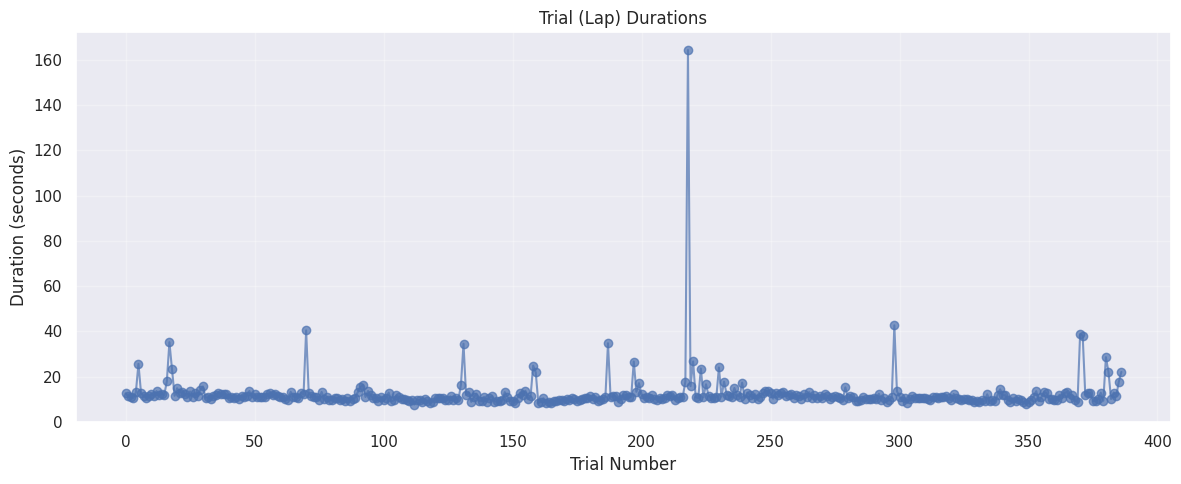

In [10]:
# Plot trial durations
plt.figure(figsize=(12, 5))
plt.plot(trials_df.index, duration, 'o-', alpha=0.7)
plt.xlabel('Trial Number')
plt.ylabel('Duration (seconds)')
plt.title('Trial (Lap) Durations')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

We can also look at the distribution of trial durations:

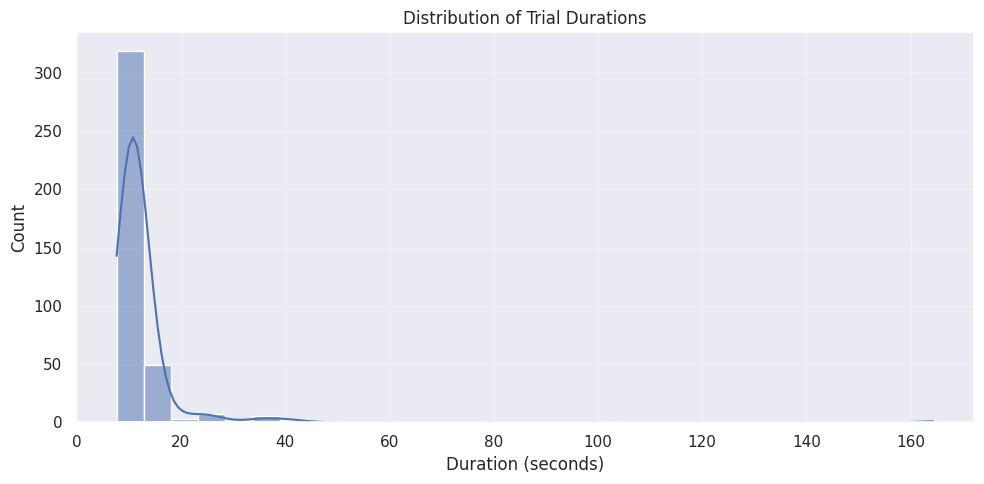

In [11]:
# Plot histogram of trial durations
plt.figure(figsize=(10, 5))
sns.histplot(duration, bins=30, kde=True)
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.title('Distribution of Trial Durations')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Exploring Neural Units

Let's examine the neural units (cells) recorded in this session.

In [12]:
# Get basic information about the units
print(f"Number of units: {len(nwb.units.id)}")
print(f"Units description: {nwb.units.description}")

# Get the available columns in the units table
print(f"Available unit properties: {nwb.units.colnames}")

Number of units: 33
Units description: units table
Available unit properties: ('spike_times',)


Let's look at spike counts for each unit:

In [13]:
# Get spike counts for each unit
spike_counts = []
for i in range(len(nwb.units.id)):
    # Get spike times for this unit
    spike_time_idx = nwb.units['spike_times'].data[i]
    count = len(spike_time_idx)
    spike_counts.append(count)

# Create a DataFrame with the units and their spike counts
units_df = pd.DataFrame({
    'unit_id': nwb.units.id[:],
    'spike_count': spike_counts
})

# Sort by spike count
units_df = units_df.sort_values('spike_count', ascending=False).reset_index(drop=True)

# Display the units with the most spikes
print("Units with the most spikes:")
units_df.head(10)

TypeError: object of type 'numpy.uint64' has no len()

Let's visualize the spike counts for all units:

In [14]:
# Plot spike counts for all units
plt.figure(figsize=(12, 6))
plt.bar(range(len(units_df)), units_df['spike_count'], alpha=0.7)
plt.xlabel('Unit Index (sorted by spike count)')
plt.ylabel('Spike Count')
plt.title('Spike Counts for All Units')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

NameError: name 'units_df' is not defined

<Figure size 1200x600 with 0 Axes>

## Analyzing Spike Times

Now let's look at the spike times for a few units. We'll examine when these units are firing, especially in relation to the trials (laps).

In [15]:
# Select a few units to analyze (choosing ones with substantial spike counts)
top_units = units_df.head(5)['unit_id'].tolist()

# Create a figure for plotting
plt.figure(figsize=(14, 8))

# Plot spike times for the selected units
for i, unit_id in enumerate(top_units):
    unit_idx = int(unit_id)  # Convert to index
    spike_times = nwb.units['spike_times'].data[unit_idx]
    plt.plot(spike_times, [i] * len(spike_times), '|', markersize=4, label=f'Unit {unit_id}')

# Add trial boundaries as vertical lines
for _, trial in trials_df.iterrows():
    plt.axvspan(trial['start_time'], trial['stop_time'], color='lightgray', alpha=0.3)

# Add labels and legend
plt.yticks(range(len(top_units)), [f'Unit {id}' for id in top_units])
plt.xlabel('Time (seconds)')
plt.title('Spike Times for Top Units with Trial Boundaries')
plt.grid(True, alpha=0.3)

# Set reasonable x-axis limits (first 100 seconds for better visibility)
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

NameError: name 'units_df' is not defined

Let's create a more detailed raster plot for one specific unit, showing its activity across trials:

In [16]:
# Select one unit for detailed analysis (using the unit with the most spikes)
selected_unit_id = units_df.iloc[0]['unit_id']
selected_unit_idx = int(selected_unit_id)

# Get spike times for this unit
spike_times = nwb.units['spike_times'].data[selected_unit_idx]

# Create a figure for the raster plot
plt.figure(figsize=(14, 10))

# Plot spike times for each trial
for i, (_, trial) in enumerate(trials_df.iterrows()):
    # Filter spikes within this trial
    trial_spikes = spike_times[(spike_times >= trial['start_time']) & 
                               (spike_times <= trial['stop_time'])]
    
    # Normalize spike times to trial start
    normalized_spikes = trial_spikes - trial['start_time']
    
    # Plot spikes for this trial
    plt.plot(normalized_spikes, [i] * len(normalized_spikes), '|', markersize=4, color='black')

plt.xlabel('Time from Trial Start (seconds)')
plt.ylabel('Trial Number')
plt.title(f'Raster Plot for Unit {selected_unit_id} Across All Trials')
plt.grid(True, alpha=0.3)

# Limit x-axis to the median trial duration for better visibility
median_duration = duration.median()
plt.xlim(0, median_duration)

# Only show a subset of trial numbers on y-axis for readability
if len(trials_df) > 20:
    ytick_step = len(trials_df) // 10
    plt.yticks(range(0, len(trials_df), ytick_step))

plt.tight_layout()
plt.show()

NameError: name 'units_df' is not defined

## Exploring Raw Electrophysiology Data

Let's look at some raw electrophysiology data from a subset of channels.

In [17]:
# Get information about the raw data
time_series = nwb.acquisition['time_series']
print(f"Raw data shape: {time_series.data.shape}")
print(f"Sampling rate: {time_series.rate} Hz")
print(f"Units: {time_series.unit}")

Raw data shape: (144675584, 256)
Sampling rate: 30000.0 Hz
Units: mV


Let's extract and plot a small segment of raw data for a few channels:

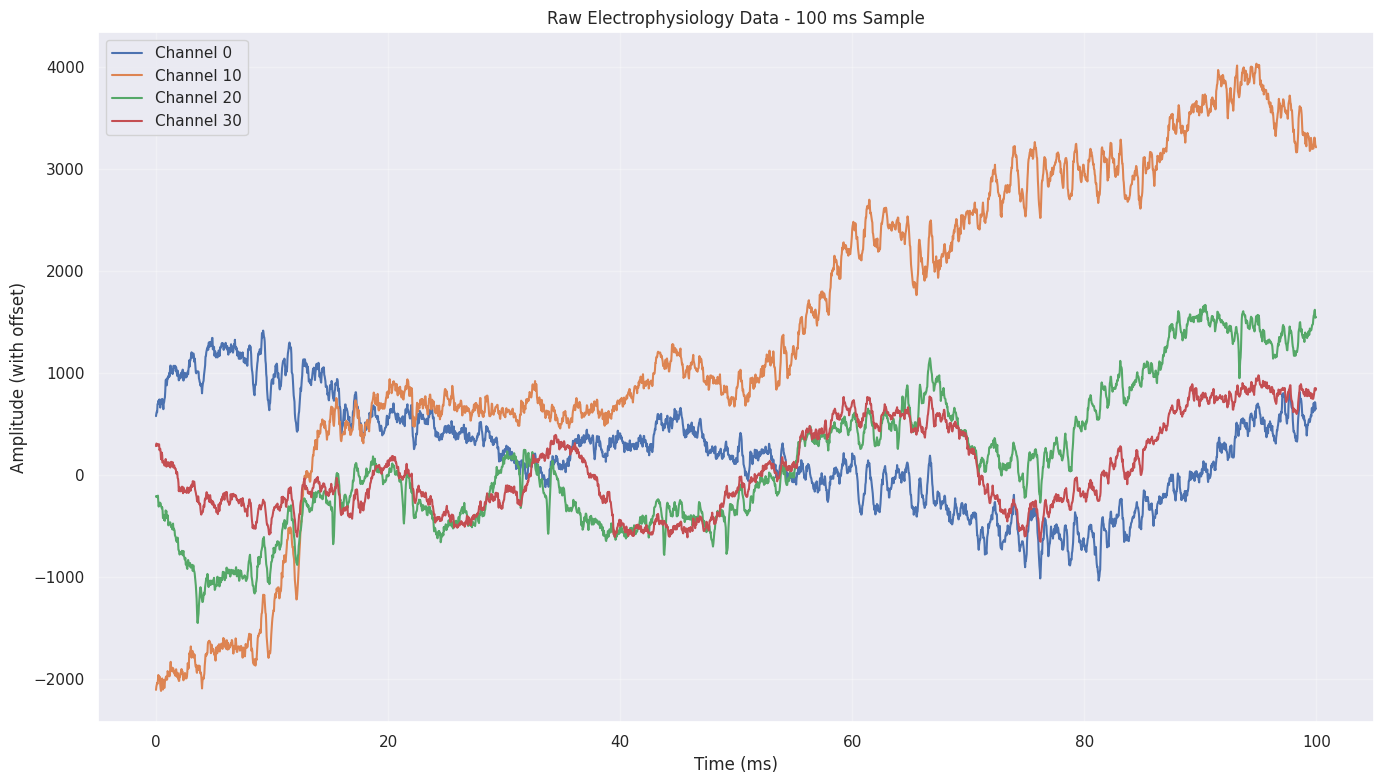

In [18]:
# Select a small time window (100 ms) and a few channels to visualize
# Because the data is large and streamed remotely, we'll keep this sample small
sample_length = int(0.1 * time_series.rate)  # 100 ms of data
start_time = 10000  # Arbitrary starting point (about 0.33 seconds into recording)
channel_indices = [0, 10, 20, 30]  # A few channels from different parts of the probe

# Extract the data
raw_data_sample = time_series.data[start_time:start_time+sample_length, channel_indices]

# Create time axis in milliseconds
time_ms = np.arange(sample_length) / time_series.rate * 1000

# Plot the raw data
plt.figure(figsize=(14, 8))
for i, channel in enumerate(channel_indices):
    # Offset each channel for better visualization
    offset = i * 200  # Arbitrary offset
    plt.plot(time_ms, raw_data_sample[:, i] + offset, label=f'Channel {channel}')

plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (with offset)')
plt.title('Raw Electrophysiology Data - 100 ms Sample')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Creating a Spectrogram from Raw Data

Let's compute and visualize a spectrogram from a slightly longer segment of raw data to see the frequency components.

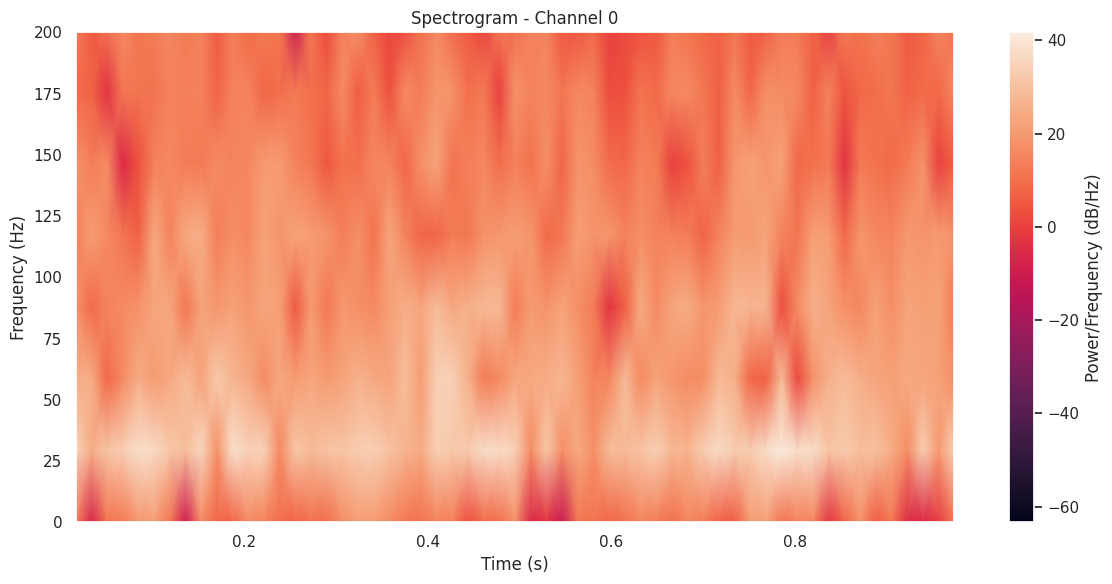

In [19]:
from scipy import signal

# Select a longer segment (1 second) from one channel for spectral analysis
channel_idx = 0  # Using the first channel
segment_length = int(time_series.rate)  # 1 second of data
start_time = 10000  # Same starting point as before

# Extract the data
data_segment = time_series.data[start_time:start_time+segment_length, channel_idx]

# Compute spectrogram
fs = time_series.rate
f, t, Sxx = signal.spectrogram(data_segment, fs=fs, nperseg=1024, noverlap=512)

# Plot the spectrogram
plt.figure(figsize=(12, 6))
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.title(f'Spectrogram - Channel {channel_idx}')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.ylim(0, 200)  # Limit to frequencies below 200 Hz for better visibility
plt.tight_layout()
plt.show()

## Analyzing Firing Rates Across Trials

Let's compute and visualize how the firing rates of units change across trials.

In [20]:
# Select the top 3 units by spike count for this analysis
top_3_units = units_df.head(3)['unit_id'].tolist()

# Initialize an array to hold firing rates
# Shape: (number of units, number of trials)
firing_rates = np.zeros((len(top_3_units), len(trials_df)))

# Compute firing rates for each unit in each trial
for i, unit_id in enumerate(top_3_units):
    unit_idx = int(unit_id)
    spike_times = nwb.units['spike_times'].data[unit_idx]
    
    for j, (_, trial) in enumerate(trials_df.iterrows()):
        # Count spikes within this trial
        trial_spikes = spike_times[(spike_times >= trial['start_time']) & 
                                  (spike_times <= trial['stop_time'])]
        trial_duration = trial['stop_time'] - trial['start_time']
        
        # Compute firing rate (spikes per second)
        firing_rates[i, j] = len(trial_spikes) / trial_duration

# Plot firing rates across trials
plt.figure(figsize=(14, 8))
for i, unit_id in enumerate(top_3_units):
    plt.plot(range(len(trials_df)), firing_rates[i], 'o-', alpha=0.7, 
             label=f'Unit {unit_id}')

plt.xlabel('Trial Number')
plt.ylabel('Firing Rate (Hz)')
plt.title('Firing Rates Across Trials for Top 3 Units')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

NameError: name 'units_df' is not defined

Let's also look at the distribution of firing rates for each unit:

In [21]:
# Plot histograms of firing rates for each unit
plt.figure(figsize=(14, 6))

for i, unit_id in enumerate(top_3_units):
    plt.subplot(1, 3, i+1)
    sns.histplot(firing_rates[i], bins=20, kde=True)
    plt.xlabel('Firing Rate (Hz)')
    plt.ylabel('Count')
    plt.title(f'Unit {unit_id} Firing Rate Distribution')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

NameError: name 'top_3_units' is not defined

<Figure size 1400x600 with 0 Axes>

## Summary and Future Directions

In this notebook, we explored Dandiset 001375, which contains electrophysiology recordings from mice running in virtual hallways. The study focuses on the effects of disrupting septal GABAergic activity using DREADDs on hippocampal and neocortical activity.

We have:

1. Loaded and examined the metadata of the Dandiset
2. Explored the structure of an NWB file from subject MS13B
3. Analyzed electrode information and trial (lap) data
4. Examined neural unit activity, including spike times and firing rates
5. Visualized raw electrophysiology data and spectrograms

### Potential future analyses:

1. **Spatial coding analysis**: Correlate neural activity with position in the virtual hallway to identify place cells
2. **Phase locking analysis**: Examine relationships between spike timing and local field potential oscillations
3. **Cross-session comparison**: Compare neural activity across different subjects and sessions to understand the effects of DREADDs intervention
4. **Network analysis**: Examine functional connectivity between different units and brain regions
5. **Comparison with control data**: Compare these recordings with control sessions (if available) to quantify the effects of GABAergic disruption

### Next steps:

To further explore this dataset, one could:

- Analyze data from the other NWB files in the Dandiset
- Perform more sophisticated spectral analyses of the local field potentials
- Apply dimensionality reduction techniques like PCA or t-SNE to visualize patterns in neural activity
- Correlate neural activity with specific behavioral events or performance metrics